## Visualising Learnt Word Embeddings

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import keras

from sklearn.manifold import TSNE


#actual path
fileDir = os.path.dirname(os.path.realpath('__file__'))
print (fileDir)

#correct path
model_path = os.path.join(fileDir, '../model/model_4std_20emb_15po.h5')
print(model_path)

model = keras.models.load_model(model_path)

/Users/Kelvin/Github/Hybrid_movie_recommender/src
/Users/Kelvin/Github/Hybrid_movie_recommender/src/../model/model_4std_20emb_15po.h5


In [2]:
model

In [4]:
ratings_path = os.path.join(fileDir, '../processed_data/ratings_content.csv')
ratings = pd.read_csv(ratings_path)

In [5]:
emb_layer = model.get_layer('movie_embedding')
(w,) = emb_layer.get_weights()
w.shape

(53617, 20)

In [12]:
# import pickle

# # pickle.dump(model, open('model_4std_20emb_15po.pkl', 'wb'))
# with open('model_4std_20emb_15po.pkl', 'w') as f:
#     pickle.dump(model, f)

In [17]:
# import pickle
# with open("model_4std_20emb_15po.pkl", "rb") as f:
#     appt_model = pickle.load(f)

In [6]:
model.get_layer('movie_embedding')

In [7]:
w

array([[-0.9786656 ,  0.451162  ,  1.2433277 , ..., -0.18111053,
        -0.2632278 ,  0.5588853 ],
       [ 0.18023796,  0.11086269,  0.5929028 , ...,  0.6193371 ,
         0.35260963,  0.89966065],
       [ 1.0509822 ,  0.1923326 ,  1.3993932 , ...,  0.16212788,
        -0.2794976 ,  0.36815876],
       ...,
       [ 0.0445765 , -0.00542498,  0.00480145, ..., -0.0063029 ,
         0.00682664,  0.04420226],
       [ 0.01829081,  0.00393828,  0.00910252, ..., -0.03052237,
        -0.04852257, -0.03876771],
       [-0.7264511 ,  0.5278983 ,  0.45824578, ...,  0.6170283 ,
        -0.6034498 ,  0.7835895 ]], dtype=float32)

In [9]:
movies_path = os.path.join(fileDir, '../processed_data/movies_content.csv')
movies_df = pd.read_csv(movies_path)
movies_df.head()

,movieId,title,genres,orig_movieId,key,year,full_title,n_ratings,mean_rating
0,0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story,1995,Toy Story (1995),68469,3.886649
1,1,Jumanji,Adventure|Children|Fantasy,2,Jumanji,1995,Jumanji (1995),27143,3.246583
2,2,Grumpier Old Men,Comedy|Romance,3,Grumpier Old Men,1995,Grumpier Old Men (1995),15585,3.173981
3,3,Waiting to Exhale,Comedy|Drama|Romance,4,Waiting to Exhale,1995,Waiting to Exhale (1995),2989,2.874540
4,4,Father of the Bride Part II,Comedy,5,Father of the Bride Part II,1995,Father of the Bride Part II (1995),15474,3.077291


In [10]:
from gensim.models.keyedvectors import WordEmbeddingsKeyedVectors

# Limit to movies with at least this many ratings in the dataset
threshold = 100
mainstream_movies = movies_df[movies_df.n_ratings >= threshold].reset_index(drop=True)

movie_embedding_size = w.shape[1]
kv = WordEmbeddingsKeyedVectors(movie_embedding_size)
kv.add(
    mainstream_movies['key'].values,
    w[mainstream_movies.movieId]
)

In [11]:
kv.most_similar('Brokeback Mountain')

[('Boyhood', 0.7834237217903137),
 ('Milk (2008)', 0.7764260768890381),
 ('20th Century Women', 0.7681741118431091),
 ('21 Up', 0.743675947189331),
 ('Red Desert (Deserto rosso, Il)', 0.740821897983551),
 ('The Florida Project', 0.730254054069519),
 ('Moonlight', 0.7167819142341614),
 ('Vicky Cristina Barcelona', 0.7125096321105957),
 ('Summer Storm (Sommersturm)', 0.7114472985267639),
 ('Monster (2003)', 0.7035839557647705)]

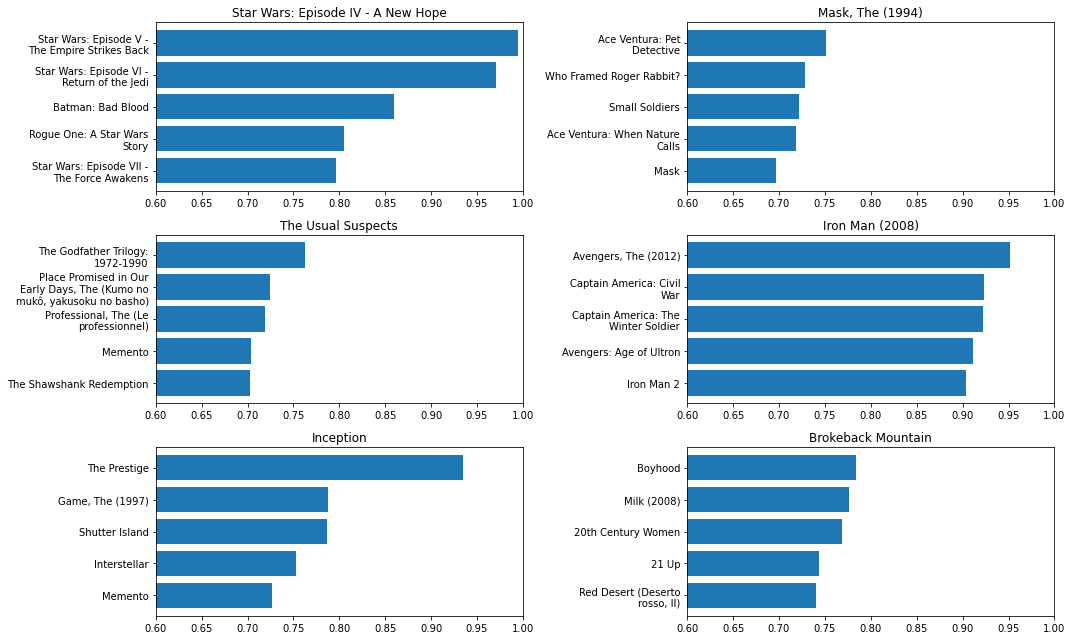

In [12]:
import textwrap
movies = ['Star Wars: Episode IV - A New Hope', 'Mask, The (1994)', 'The Usual Suspects', 'Iron Man (2008)',
          'Inception', 'Brokeback Mountain']

def plot_most_similar(movie, ax, topn=5):
    sim = kv.most_similar(movie, topn=topn)[::-1]
    y = np.arange(len(sim))
    w = [t[1] for t in sim]
    ax.barh(y, w)
    left = min(.6, min(w))
    ax.set_xlim(right=1.0, left=left)
    # Split long titles over multiple lines
    labels = [textwrap.fill(t[0] , width=24)
              for t in sim]
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    ax.set_title(movie)    

fig, axes = plt.subplots(3, 2, figsize=(15, 9))

for movie, ax in zip(movies, axes.flatten()):
    plot_most_similar(movie, ax)
    
fig.tight_layout()
plt.show()

> **Observations:** In general, we see that embeddings have done a good job at  
- Querrting Star Wars identifies all the movies in Sci-Fi and Fantasy genre. It interestingly also suggests its sequels too.
- The Mask correctly brings out all the comedy movies together. Thus, doing a good job at identifying the genre.
- The Nearest Embeddings for Iron Man fetches all the Marvel movies.
- Inception querries surprisingly bring out all the movies from the same director- Christophr Nolan.
- American Sniper fetches an interesting recommendation 'We were Soldiers!', identifying the theme of war and soldiers.